<h1 align=center><font size = 5>Trabajo Práctico Módulo 3: 
Aprendizaje Automático no Supervisado - Clustering </font></h1> 

### **Tabla de contenidos**

  1. [Consignas](#q1) 
  2. [Importacion de librerias](#q2) 
  3. [Carga del Dataset](#q3)
  4. [Análisis exploratorio de datos](#q4)
  5. [Outliers](#q5)
  6. [Modelización](#q6)
      1. [Evaluar y efectuar las transformaciones de variables necesarias](#q7)
      2. [Kmeans](#q8)
      3. [DBSCAN](#q9)
      4. [Clústering jerárquico](#q10)
      5. [PCA](#q12)


#### Consignas <a name="q1"></a>


**Descripción:**

Para este proyecto, se provee de un conjunto de datos con las siguientes características:  

* Origen: Exposys Data Labs  
* Columnas:  
  * CustomerID: identificador único del cliente
  * Gender: género del cliente
  * Age: edad del cliente
  * Annual Income (k$): ingresos mensuales del cliente
  * Spending Score (1-100): puntaje relacionado al nivel de gastos del cliente

Consigna:  

Los objetivos principales del proyecto son dos:  
* Identificar la base de clientes con mayor potencial para la venta de producto/s.
*  Implementar algoritmos de clustering para segmentar la base de clientes.

El trabajo debe incluir:

1) Análisis exploratorio de datos:
 * Descripción de las variables
 * Verificar si hay valores faltantes y outliers
 * Visualizaciones necesarias para comprender los datos
 * Análisis de Distribución y Análisis de correlación de las variables

2) Modelización

 * Seleccionar las variables para la posterior clusterización
 * Evaluar y efectuar las transformaciones de variables necesarias (ej: estandarización, normalización, etc)
 * Aplicar K-Means, DBSCAN y clustering jerárquico (incluir dendograma)
 * Analizar la factibilidad de aplicar reducción de dimensionalidad. Probar el efecto en los algoritmos mencionados
 * Describir los clusters obtenidos y ponerles nombres/etiquetas significativas
 * Reportar los resultados de ambos modelos finales, incluyendo justificación de los hiperparámetros escogidos y del por qué de las variables utilizadas

3) Se debe entregar:
 * Jupyter notebook o un archivo .py con el código organizado. Deben incluirse comentarios y breve interpretaciones de los resultados.
 * Una presentación de máximo 15 diapositivas explicando los hallazgos obtenidos (no más de 5 minutos).







#### Importamos librerías <a name="q2"></a>

In [ ]:
%%capture
!pip install imblearn
!pip install shap
!pip install ipywidgets
!pip install kmodes
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from sklearn. cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.float_format', lambda x: '%.3f' % x) #Para transformar la notación científica

#### Carga del Dataset <a name="q3"></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Diplo DS -Grupo 01/TP3/Mall_Customers.csv')


## Análisis exploratorio <a name="q4"></a>

In [ ]:
#Vemos la cantidad de filas y columnas del dataset para tener una idea del tamaño del dataset

print("El dataset cuenta con", df.shape[0], "filas y", df.shape[1], "columnas")

El dataset cuenta con 200 filas y 5 columnas


In [ ]:
#Vemos las primeras filas del dataset

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Vemos algunas filas random del dataset

df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
76,77,Female,45,54,53
112,113,Female,38,64,42
80,81,Male,57,54,51
39,40,Female,20,37,75
106,107,Female,66,63,50


In [ ]:
# Vemos información del set de datos en general. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Vemos la proporción de nulos por columna, si hay valores faltantes

df.isnull().sum()/len(df)

CustomerID               0.000
Gender                   0.000
Age                      0.000
Annual Income (k$)       0.000
Spending Score (1-100)   0.000
dtype: float64

Con esto podemos verificar si hay valores nulos en alguna columna. A su vez nos sirve para chequear que los Dtype sean los correctos según el tipo de dato de cada columna. 

En este caso vemos que no hay valores nulos, ya que el data set tiene 200 filas y hay 200 no nulos en cada columna. También lo podemos ver con la proporción de nulos, ya que es cero en todos los casos.
 

In [ ]:
#Renombramos las columnas Annual Income (k$) por Annual_Income, y la columna Spending Score (1-100) por Spending_Score

df.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score' ]

In [ ]:
#Vemos medidas descriptivas 

df.describe(include='all')

,CustomerID,Gender,Age,Annual_Income,Spending_Score
count,200.000,200,200.000,200.000,200.000
unique,nan,2,nan,nan,nan
top,nan,Female,nan,nan,nan
freq,nan,112,nan,nan,nan
mean,100.500,NaN,38.850,60.560,50.200
std,57.879,NaN,13.969,26.265,25.824
min,1.000,NaN,18.000,15.000,1.000
25%,50.750,NaN,28.750,41.500,34.750
50%,100.500,NaN,36.000,61.500,50.000
75%,150.250,NaN,49.000,78.000,73.000


Podemos apreciar que el data set contiene 200 filas, y está compuesto por las categorías:


-Customer id: identificación del cliente o usuario.


-Género: variable categórica cuya mayor frecuencia es Femenino.


-Edad: la edad promedio de la muestra es de 39 años aproximadamente, de un rango de 18 a 70 años.


-Ingreso anual: en promedio es de 61 mil, con un rango que oscila entre  15 mil a 137 mil (pero el 75% de la muestra se encuentra por debajo de 78 mil, lo cual podría indicar la presencia de valores extremos).


-Spending Score: en promedio es de 50 puntos, dado que el rango de score es de 1-100.

In [ ]:
#Se verifica si hay alguna fila duplicada completamente (en todos sus campos)

df.duplicated().sum()

0

Observamos que no hay filas duplicadas, por lo que no realizamos ninguna acción. 

In [ ]:
#Verificamos los valores únicos de la columna gender para verificar que no haya valores faltantes del tipo Unknown. 

df.Gender.unique()

array(['Male', 'Female'], dtype=object)

Hemos verificado que la variable categórica género sólo comprende a masculino y femenino, no conteniendo "unknown" como una categoría nula (encubierta), con lo cual las 200 filas de la muestra están categorizadas por género.

In [ ]:
#Calculamos la edad promedio de los clientes

print("La edad promedio es de:", round(df['Age'].mean()), "años")

La edad promedio es de: 39 años


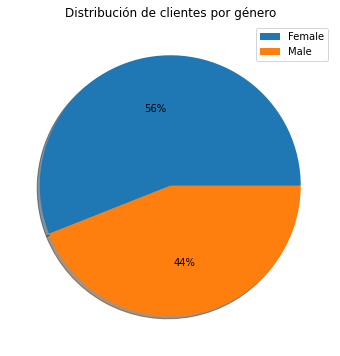

In [ ]:
#Vemos la distribución de la variable género

plt.figure(figsize=(10,6))
y = df.Gender.value_counts()
plt.pie(y, autopct='%1.0f%%', shadow = True)
plt.title('Distribución de clientes por género')
plt.legend(y.index, loc="best")
plt.show() 


Como se explico en describe el género se distribuye en  masculino y femenino, teniendo una proporción ligeramente mayor en esta última (56%).

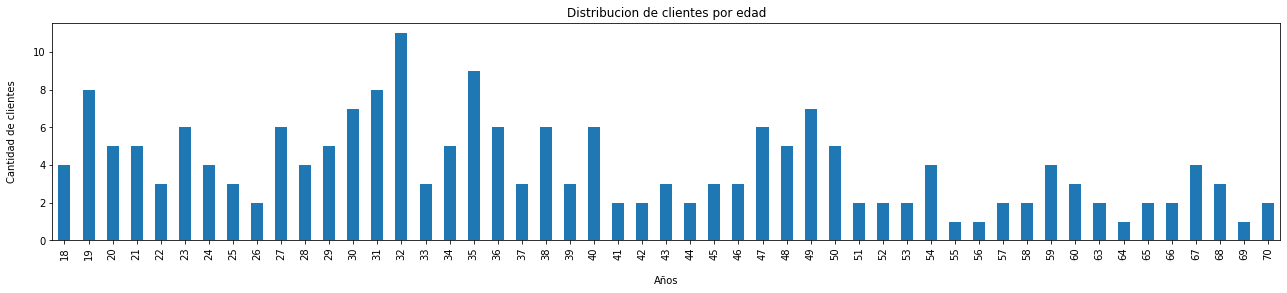

In [ ]:
#Vemos la distribución de la variable edad

plt.figure(figsize=(22,4 ))
plt.xlabel("\nAños")
plt.ylabel("Cantidad de clientes\n")
df['Age'].value_counts().sort_index().plot(kind='bar', title='Distribucion de clientes por edad')
plt.show()

In [ ]:
#Calculamos el Annual_Income promedio de los clientes

print("El promedio de Annual Income es:", round(df['Annual_Income'].mean()), "K")

El promedio de Annual Income es: 61 K


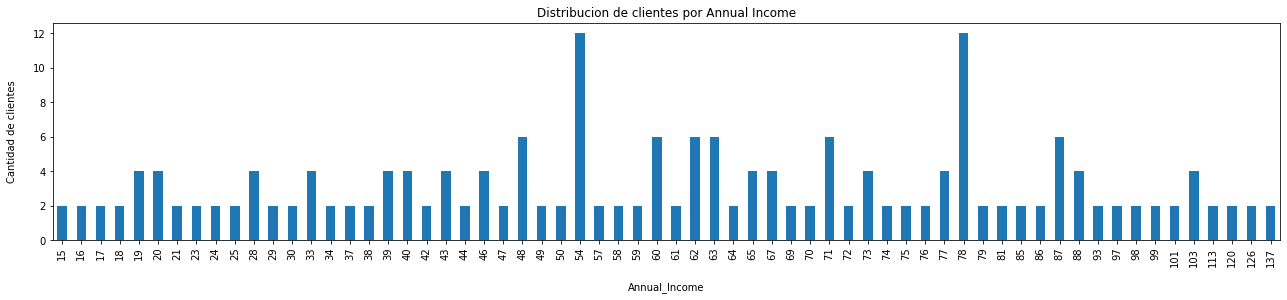

In [ ]:
#Vemos la distribución de la variable Annual_Income

plt.figure(figsize=(22,4 ))
plt.xlabel("\nAnnual_Income")
plt.ylabel("Cantidad de clientes\n")
df['Annual_Income'].value_counts().sort_index().plot(kind='bar', title='Distribucion de clientes por Annual Income')
plt.show()

In [ ]:
#Calculamos el Spending_Score promedio de los clientes

print("El promedio de Spending Score es:", round(df['Spending_Score'].mean()))

El promedio de Spending Score es: 50


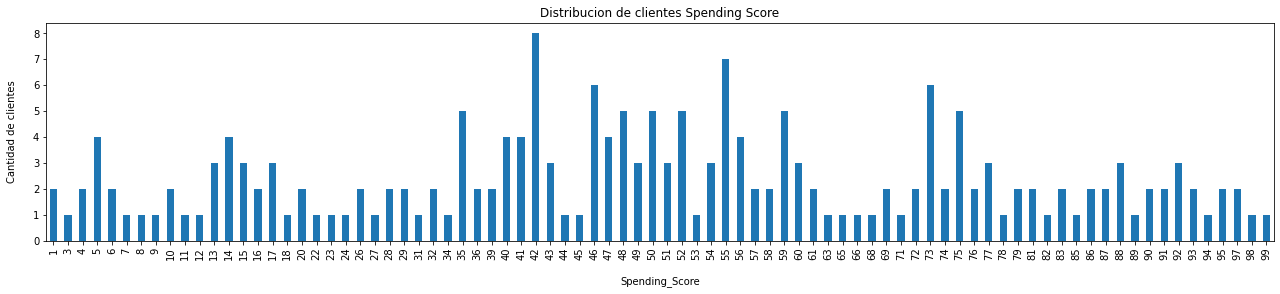

In [ ]:
#Vemos la distribución de la variable Spending_Score

plt.figure(figsize=(22,4 ))
plt.xlabel("\nSpending_Score")
plt.ylabel("Cantidad de clientes\n")
df['Spending_Score'].value_counts().sort_index().plot(kind='bar', title='Distribucion de clientes Spending Score')
plt.show()

Las distribuciones univariadas de clientes permiten conocer cómo se comporta la muestra para las variables analizada.

Así, para la variable edad hay un pico notable en torno a los 30 años; y en el rango de 18 a 70 podemos apreciar que las edades de 61 y 62 están vacías (no tienen clientes de esa edad).

En la variable ingreso anual, existen dos picos uno en los 54 mil y otro en los 78 mil que concentran más clientes.

En relación al score o puntaje por nivel de gastos, se puede apreciar una distribución con algunos picos o sobresaltos.

A continuación, analizaremos si existe correlación entre las principales variables.

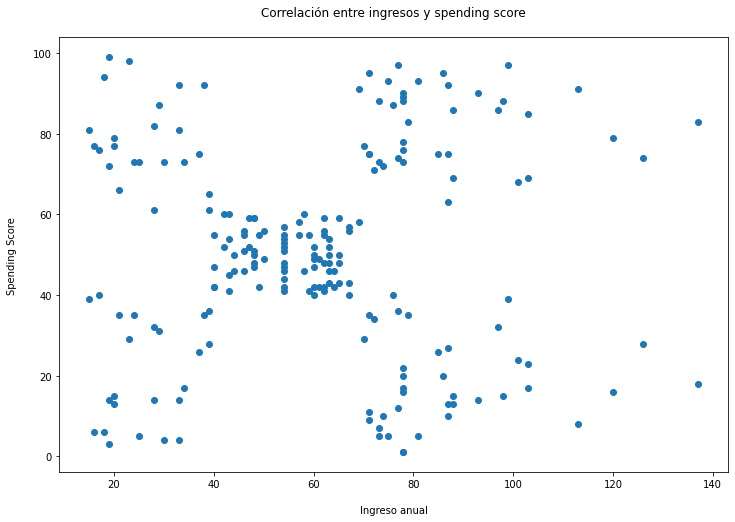

In [ ]:
#Correlación entre ingresos y spending score.

x= df.Annual_Income
y= df.Spending_Score

plt.figure(figsize=(12,8))
plt.scatter(x,y)
plt.xlabel("\nIngreso anual")
plt.ylabel("Spending Score\n")
plt.title('Correlación entre ingresos y spending score\n')
plt.show()

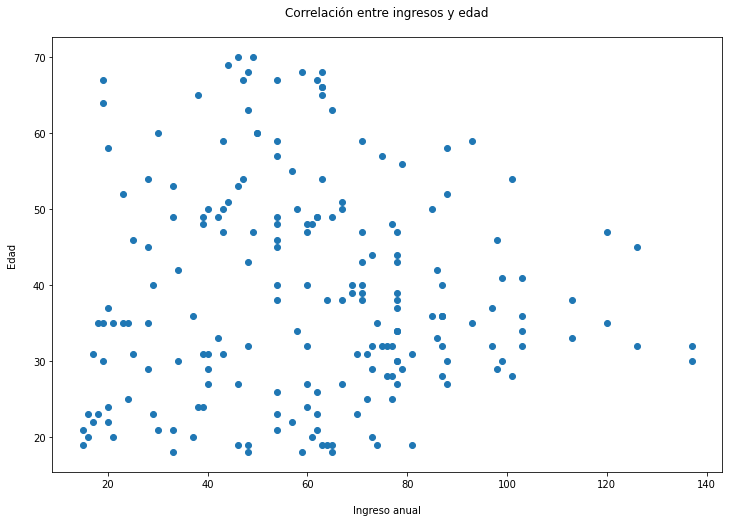

In [ ]:
#Correlación entre ingresos y edad.

x= df.Annual_Income
y= df.Age

plt.figure(figsize=(12,8))
plt.scatter(x,y)
plt.xlabel("\nIngreso anual")
plt.ylabel("Edad\n")
plt.title('Correlación entre ingresos y edad\n')
plt.show()

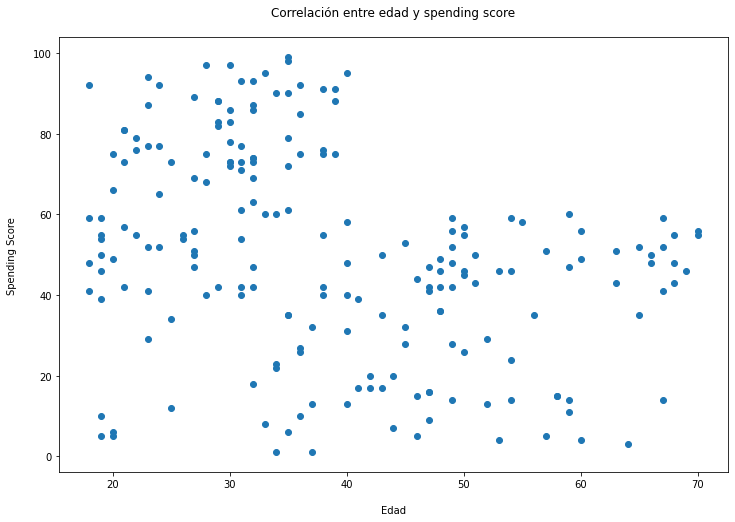

In [ ]:
#Correlación entre edad y spending score.

x= df.Age
y= df.Spending_Score

plt.figure(figsize=(12,8))
plt.scatter(x,y)
plt.xlabel("\nEdad")
plt.ylabel("Spending Score\n")
plt.title('Correlación entre edad y spending score\n')
plt.show()

Tanto en los gráficos anteriores como en el mapa de calor, podemos apreciar que no existe correlación lineal aparente entre las variables seleccionadas, con lo cual las relaciones podrían estar "ocultas" a la vista y es por ello que el data set es candidato para un análisis de clustering.  

También podemos mencionar que para los usuarios con más de 40 años no se visualiza un spending score mayor a 60. Esto podemos verlo en el último gráfico de correlación. 

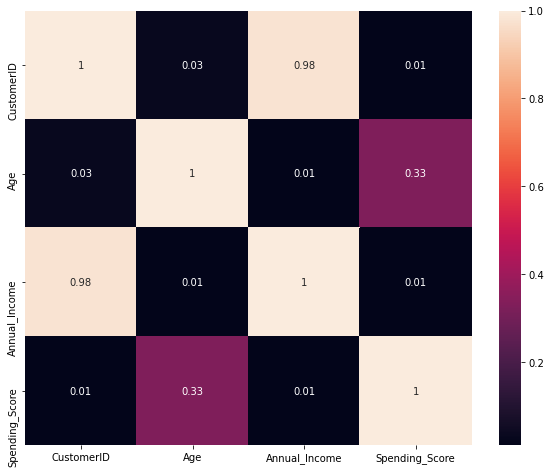

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(round(abs(df.corr()),2),
            annot=True)
plt.show()

En este caso la correlación con customer id no es analizada debido a que todos los clientes poseen un número identificatorio asociado, por eso las "correlaciona".

In [ ]:
fig = px.scatter_3d(df, x='Age', y='Annual_Income', z='Spending_Score',
                    color='Gender',
                    hover_data=['Gender'],
                    opacity=0.5)
fig.update_layout(title='3D')
fig.show()

En el gráfico ubicamos en un plano tridimensional, las variables: edad, annual income y spending score para poder visualizar la distribución de los datos.  
A simple vista podemos observar que los colores de los puntos que reflejan el género del usuario tienen una distribución similar por lo que podemos concluir que no hay diferencias entre el género femenino y masculino en cuanto a las variables Annual_Income y Spending_Score

#### Outliers <a name="q5"></a>

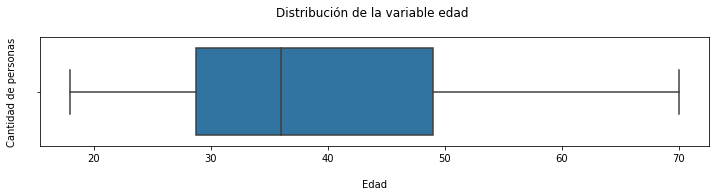

In [ ]:
#Analizamos la distribución de la variable edad mediante un boxplot

plt.figure(figsize=(12,2))
sns.boxplot(x=df.Age)
plt.title('Distribución de la variable edad \n')
plt.xlabel("\nEdad")
plt.ylabel("Cantidad de personas\n")
plt.show()

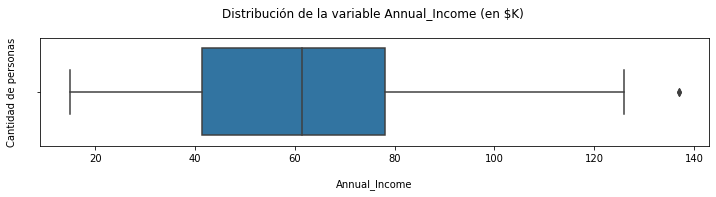

In [ ]:
#Analizamos la distribución de la variable Annual_Income mediante un boxplot

plt.figure(figsize=(12,2))
sns.boxplot(x=df.Annual_Income)
plt.title('Distribución de la variable Annual_Income (en $K) \n')
plt.xlabel("\nAnnual_Income")
plt.ylabel("Cantidad de personas\n")
plt.show()

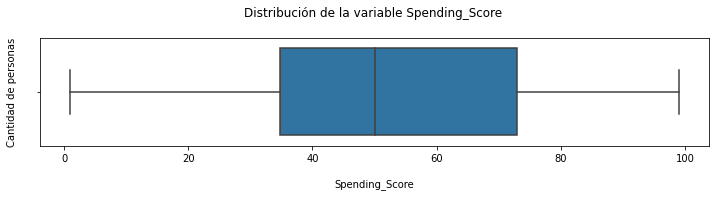

In [ ]:
#Analizamos la distribución de la variable Spending_Score mediante un boxplot

plt.figure(figsize=(12,2))
sns.boxplot(x=df.Spending_Score)
plt.title('Distribución de la variable Spending_Score \n')
plt.xlabel("\nSpending_Score")
plt.ylabel("Cantidad de personas\n")
plt.show()

Como observamos en los 3 gráficos anteriores, solo tenemos valores atípicos en los ingresos anuales.
Esto podía intuirse al inicio cuando describimos estadísticamente el data set.

Para evaluarlos, utilizaremos la tecnica denominada IQR Score para remover outliers (valores extremos). Dicha regla establece que los valores fuera del rango (Q1 - 1.5 IQR) y (Q3 + 1.5 IQR) se pueden considerar un outlier y pueden ser removidos.

* Q1= es el valor en el cual o por debajo del cual queda aproximadamente un cuarto (25%) de todos los valores de la sucesión (ordenada)
* Q3 = es el valor por debajo del cual quedan las tres cuartas partes (75%) de los datos.
* IQR= rango intercuartil Q3- Q1

Según esta regla, existen dos observaciones o clientes que son "outliers" por tener ingresos anuales de 137 mil. No obstante, no los eliminaremos del análisis, dado que pueden existir este tipo de diferencias en los ingresos pero no necesariamente sean errores del data set, sino que representan en la muestra que la población posee personas que ganan mayores ingresos en el último decil aunque sean pocas.

# Modelización <a name="q6"></a>

Se desea segmentar la base de clientes e identificar aquellos con mayor potencial para la venta de productos / servicios.
Dado el objetivo definido, es que seleccionamos las variables Ingreso Anual y Spending Score, ya que precisamos detectar aquellos clientes que posean ingresos sustanciosos y que les permitan adquirir productos (aumentar su nivel de gasto).

In [ ]:
df.columns 

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

#### Evaluar y efectuar las transformaciones de variables necesarias <a name="q7"></a>




In [ ]:
standar = pd.DataFrame()
standar['Gender'] = df['Gender'].copy()
df.drop(['Gender'], axis=1, inplace= True)

In [ ]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(df[['Annual_Income','Spending_Score']])

#KMEANS <a name="q8"></a>

### Método del codo

In [ ]:
# Preparamos una lista donde vamos a ir agregando las distancias medias
Sum_of_squared_distances = []
# Fiteamos un modelo para cada numero de cluster que queremos testear
K = np.arange(2,10)
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(standard_df)
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,standard_df.shape[0])
    Sum_of_squared_distances.append(distancia_media)

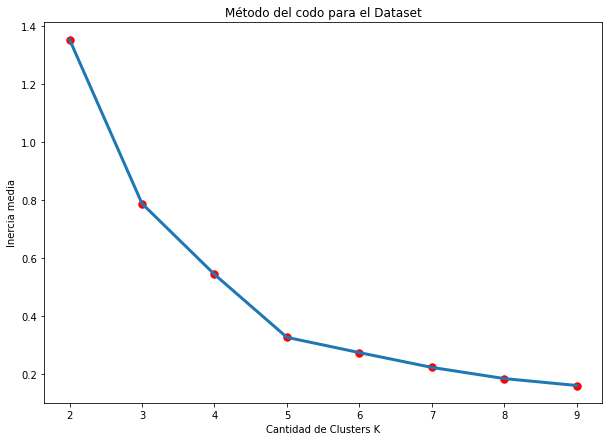

In [ ]:
#Gráfico de codo

plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset')

plt.show()

### Grafico de silueta

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.28793808282017214
For n_clusters = 3 The average silhouette_score is : 0.46658474419000145
For n_clusters = 4 The average silhouette_score is : 0.4939069237513199
For n_clusters = 5 The average silhouette_score is : 0.5546571631111091
For n_clusters = 6 The average silhouette_score is : 0.5380630705007141


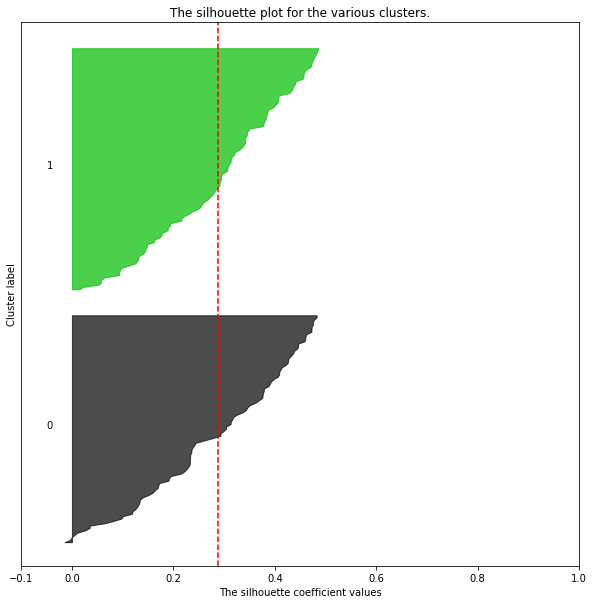

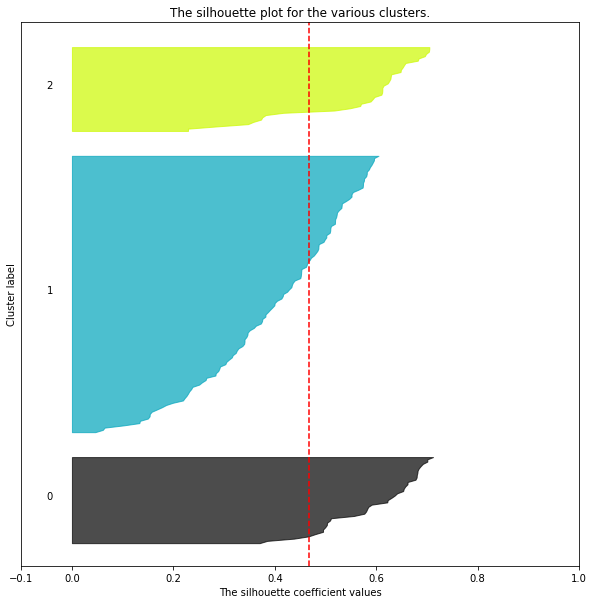

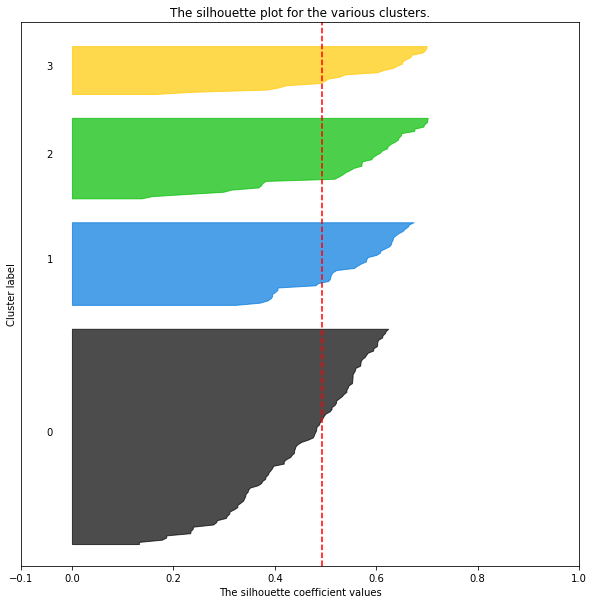

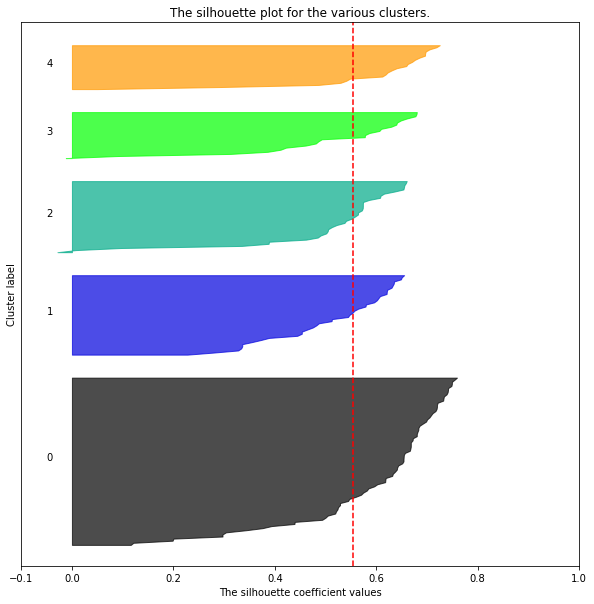

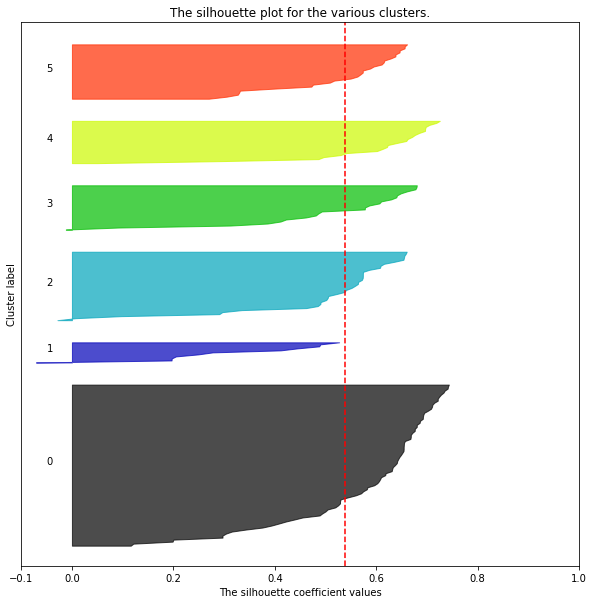

In [ ]:
print(__doc__)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(10,10)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(standard_df) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(standard_df) 

    silhouette_avg = silhouette_score(standard_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(standard_df, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
plt.show()

Se elije un K=5 ya que para este valor la silueta presenta proporciones similares, en comparación a los gráficos las siluetas analizadas para los demás K. 

A su vez, esto es confirmado por el método del codo, donde la inercia deja de tener un grado de disminución pronunciada, y la utilización de más K complicaría el análisis de estos grupos. 

Text(0, 0.5, 'Spending Score')

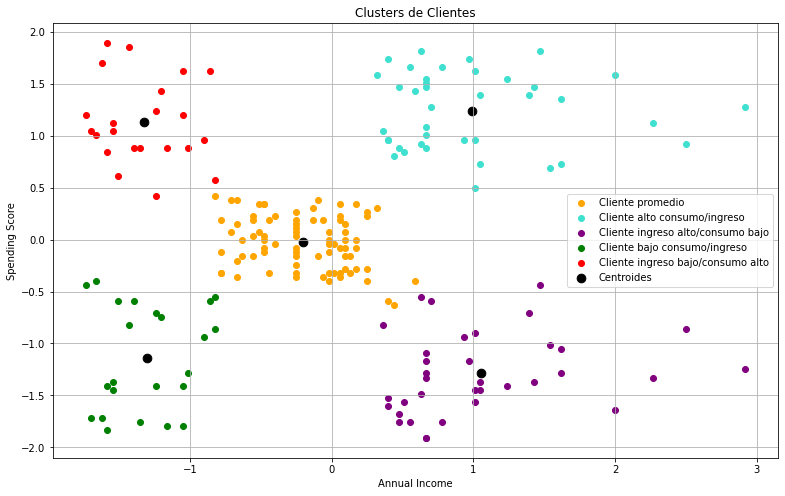

In [ ]:
plt.figure(figsize=(13,8))
model = KMeans (n_clusters= 5, random_state= 10)
y_hat = model.fit_predict(standard_df)
centros_= model.cluster_centers_
etiquetas_ = model.labels_
labels = ["Cliente promedio","Cliente alto consumo/ingreso","Cliente ingreso alto/consumo bajo","Cliente bajo consumo/ingreso","Cliente ingreso bajo/consumo alto"]
plt.scatter(standard_df[y_hat == 0,0], standard_df[y_hat == 0,1],c='orange',label=labels[0])
plt.scatter(standard_df[y_hat == 1,0], standard_df[y_hat == 1,1],c='turquoise',label=labels[1])
plt.scatter(standard_df[y_hat == 2,0], standard_df[y_hat == 2,1],c='purple',label=labels[2])
plt.scatter(standard_df[y_hat == 3,0], standard_df[y_hat == 3,1],c='green',label=labels[3])
plt.scatter(standard_df[y_hat == 4,0], standard_df[y_hat == 4,1],c='red',label=labels[4])
plt.scatter(centros_[:, 0], centros_[:, 1], s = 300, c = 'black', marker=".", label = 'Centroides')
plt.legend()
plt.grid()
plt.title('Clusters de Clientes')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

#### Descripción de los clusters:

**Clientes promedio**  
* Es el clúster más denso, que mayor cantidad de clientes posee, es decir, la población está conformada mayormente por personas con un nivel de ingresos y un score de gastos promedio.
* Estos clientes, no serían a priori los principales objetivos, pero podrían ser consideradas nuevamente y mediante otras técnicas de análisis de datos, lograr un aumento en su puntaje de gasto.
* Los clientes se verifican muy cercanos, por lo que tendrían comportamientos homogéneos o similares en ingresos y en gastos.
 
**Clientes de alto consumo e ingreso**  
* Su nivel de ingresos es elevado y además tienen un alto score de gastos, estos clientes son los que generan los principales ingresos.
* Dado que están al tope de la categoría, no podrían absorber nuevos paquetes comerciales.
 
**Clientes ingreso alto / consumo bajo**  
* Son clientes que presentan ingresos altos, pero con un nivel de gastos más bien bajo.
* A priori, serían clientes objetivo, ya que tienen el potencial de gastar más ingresos.
* Este es un clúster menos compacto (de menor densidad), por lo que los clientes serían de un mayor grado de heterogeneidad.
 
**Clientes ingreso bajo y consumo alto**  
* Son personas con bajos ingresos, pero con gastos elevados.
 
**Clientes bajo consumo e ingreso**  
* Son personas con ingresos bajos que tienen un nivel de gastos menor.



#DBSCAN  <a name="q9"></a>  

In [ ]:
from sklearn.cluster import DBSCAN

#En este paso tenemos que definir el epsilon y en min_samples, los parametros del método.
dbscan_model = DBSCAN(eps=0.3, min_samples=15)
dbscan_model .fit(standard_df)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=15, n_jobs=None, p=None)

In [ ]:
#Consultamos las etiquetas
labels = dbscan_model.labels_

In [ ]:
#Número de clústers en labels
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1) 

In [ ]:
print('Número estimado de clústers: %d' % n_clusters)
print('Número estimado de elementos sin clasificar: %d' % n_noise)

Número estimado de clústers: 1
Número estimado de elementos sin clasificar: 123


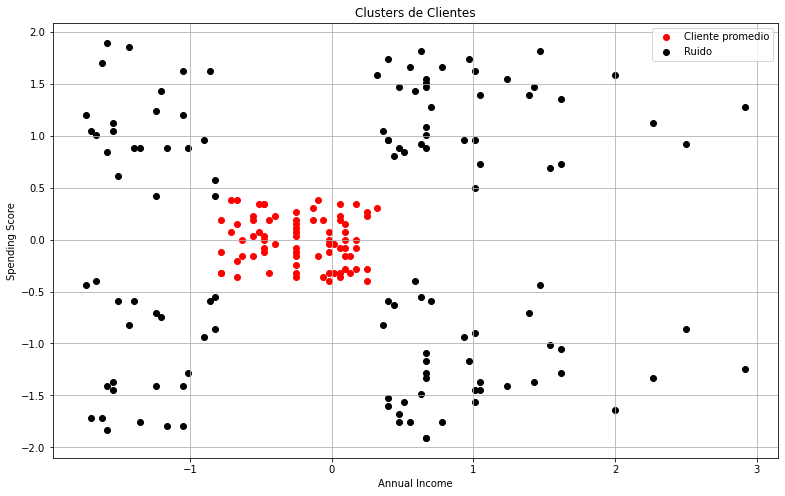

In [ ]:
plt.figure(figsize=(13,8))
y_hat = dbscan_model.fit_predict(standard_df)
etiquetas_ = dbscan_model.labels_
labels = ["Cliente promedio","Ruido"]
plt.scatter(standard_df[y_hat == 0,0], standard_df[y_hat == 0,1],c='red',label=labels[0])
plt.scatter(standard_df[y_hat == 1,0], standard_df[y_hat == 1,1],c='black',label=labels[1])
plt.scatter(standard_df[y_hat == 2,0], standard_df[y_hat == 2,1],c='black')
plt.scatter(standard_df[y_hat == 3,0], standard_df[y_hat == 3,1],c='black')
plt.scatter(standard_df[y_hat == -1,0], standard_df[y_hat == -1,1],c='black')
plt.legend()
plt.grid()
plt.title('Clusters de Clientes')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score');

Conclusiones:  

El algortimo DBSCAN permite encontrar espacios densos y diferentes a los a dispersos. En este caso podemos distinguir una zona claramente diferente a las otras ya que posee individuos con características muy similares, que podrían servir a la hora de realizar una estrategia de marketing masiva ya que son clientes de comportamientos homogéneos y son muchos los individuos con estas caracteristicas.



#Clústering Jerárquico  <a name="q10"></a>  


In [ ]:
from sklearn.cluster import AgglomerativeClustering

model_cj = AgglomerativeClustering(distance_threshold=None, n_clusters=5)
model_cj = model_cj.fit(standard_df)

In [ ]:
#Número de clústers
model_cj.n_clusters_

5

In [ ]:
Z = hierarchy.linkage(model_cj.children_, 'ward')

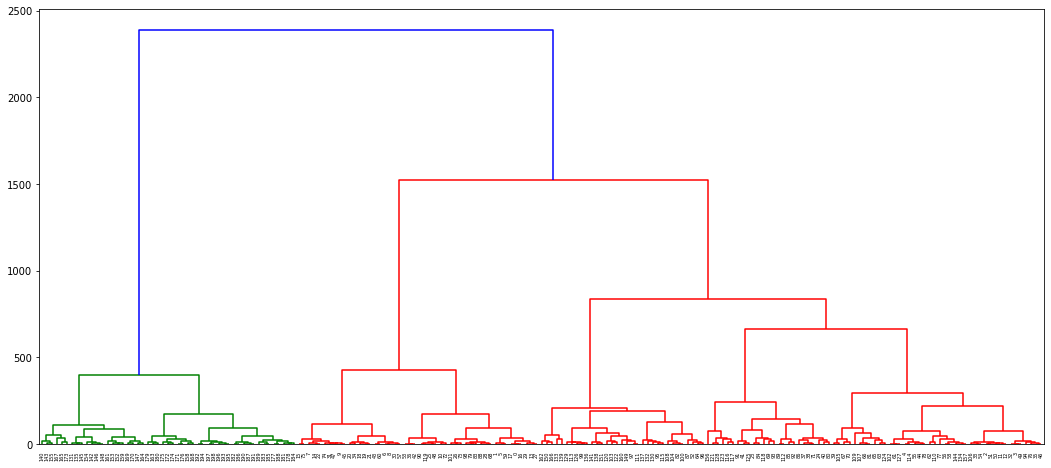

In [ ]:
plt.figure(figsize=(18,8))
dn = hierarchy.dendrogram(Z)

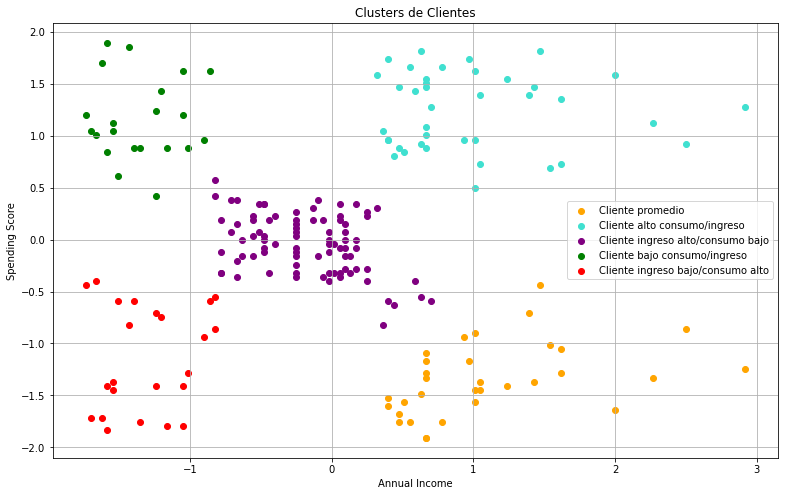

In [ ]:
plt.figure(figsize=(13,8))
y_hat = model_cj.fit_predict(standard_df)
etiquetas_ = model_cj.labels_
labels = ["Cliente promedio","Cliente alto consumo/ingreso","Cliente ingreso alto/consumo bajo","Cliente bajo consumo/ingreso","Cliente ingreso bajo/consumo alto"]
plt.scatter(standard_df[y_hat == 0,0], standard_df[y_hat == 0,1],c='orange',label=labels[0])
plt.scatter(standard_df[y_hat == 1,0], standard_df[y_hat == 1,1],c='turquoise',label=labels[1])
plt.scatter(standard_df[y_hat == 2,0], standard_df[y_hat == 2,1],c='purple',label=labels[2])
plt.scatter(standard_df[y_hat == 3,0], standard_df[y_hat == 3,1],c='green',label=labels[3])
plt.scatter(standard_df[y_hat == 4,0], standard_df[y_hat == 4,1],c='red',label=labels[4])
plt.legend()
plt.grid()
plt.title('Clusters de Clientes')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score');

#### Descripción de los clusters:


Los clústers son similares a los obtenidos en Kmeans:

* Clientes promedio

* Clientes de alto consumo e ingreso
 
* Clientes ingreso alto / consumo bajo
 
* Clientes ingreso bajo y consumo alto 
 
* Clientes bajo consumo e ingreso


# PCA <a name="q12"></a>  


In [ ]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=1)

Y_sklearn = sklearn_pca.fit_transform(standard_df)

In [ ]:
sklearn_pca.explained_variance_ratio_

array([0.50495142])

In [ ]:
Y_sklearn.shape

(200, 1)

No podemos usar PCA porque la varianza explicada al reducir la dimensionalidad en un campo, explica un porcentaje del 50% cuando al menos para poder utilizarlo debe ser del 90%. Es decir, las variables surgidas del PCA no están siendo explicativas respecto a los datos, por lo tanto, la pérdida de información es alta. 

